#Task 1. Distributions

## Normal distribution

In biology, the logarithm of various variables tend to have a normal distribution, that is, they tend to have a log-normal distribution (after separation on male/female subpopulations), with examples including:
Measures of size of living tissue (length, height, skin area, weight).

The length of inert appendages (hair, claws, nails, teeth) of biological specimens, in the direction of growth; presumably the thickness of tree bark also falls under this category.

Certain physiological measurements, such as blood pressure of adult humans.

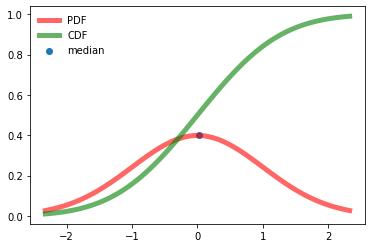

In [28]:
import numpy as np
from scipy.stats import norm, poisson, gamma
import matplotlib.pyplot as plt

x = np.linspace(norm.ppf(0.01),
                norm.ppf(0.99), 100)
plt.plot(x, norm.pdf(x), 'r-', lw=5, alpha=0.6, label = 'PDF')
plt.plot(x, norm.cdf(x), 'g-', lw=5, alpha=0.6, label = 'CDF')
half_prob = np.argmin(np.abs(norm.cdf(x) - 0.5))
half_prob = x[half_prob]
plt.scatter(half_prob, norm.pdf(half_prob), label = 'median')
plt.legend(loc='best', frameon=False)
plt.show()


## Gamma distribution

The gamma distribution has been used to model the size of insurance claims and rainfalls. This means that aggregate insurance claims and the amount of rainfall accumulated in a reservoir are modelled by a gamma process – much like the exponential distribution generates a Poisson process.

The gamma distribution is also used to model errors in multi-level Poisson regression models, because a mixture of Poisson distributions with gamma distributed rates has a known closed form distribution, called negative binomial.

In wireless communication, the gamma distribution is used to model the multi-path fading of signal power; see also Rayleigh distribution and Rician distribution.

In oncology, the age distribution of cancer incidence often follows the gamma distribution, whereas the shape and scale parameters predict, respectively, the number of driver events and the time interval between them.

In neuroscience, the gamma distribution is often used to describe the distribution of inter-spike intervals.

In bacterial gene expression, the copy number of a constitutively expressed protein often follows the gamma distribution, where the scale and shape parameter are, respectively, the mean number of bursts per cell cycle and the mean number of protein molecules produced by a single mRNA during its lifetime.

In genomics, the gamma distribution was applied in peak calling step (i.e. in recognition of signal) in ChIP-chip and ChIP-seq data analysis.

The gamma distribution is widely used as a conjugate prior in Bayesian statistics. It is the conjugate prior for the precision (i.e. inverse of the variance) of a normal distribution. It is also the conjugate prior for the exponential distribution.

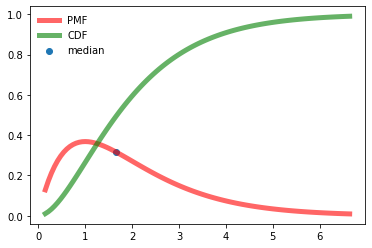

In [34]:
mu = 2

x = np.linspace(gamma.ppf(0.01, mu),
                gamma.ppf(0.99, mu), 100)
plt.plot(x, gamma.pdf(x, mu), 'r-', lw=5, alpha=0.6, label = 'PMF')
plt.plot(x, gamma.cdf(x, mu), 'g-', lw=5, alpha=0.6, label = 'CDF')
half_prob = np.argmin(np.abs(gamma.cdf(x, mu) - 0.5))
half_prob = x[half_prob]
plt.scatter(half_prob, gamma.pdf(half_prob, mu), label = 'median')
plt.legend(loc='best', frameon=False)
plt.show()


# Task 2. Confidence interval

In [53]:
from numpy import random 
from tqdm import tqdm

number_of_runs = 10000
probs = []
for run in tqdm(range(number_of_runs)):
  size=1000000
  x=random.randint(1, 7, size=size)
  success = len(np.where(x == 6)[0])
  probability = success / size
  probs.append(probability)



100%|██████████| 10000/10000 [02:52<00:00, 57.99it/s]


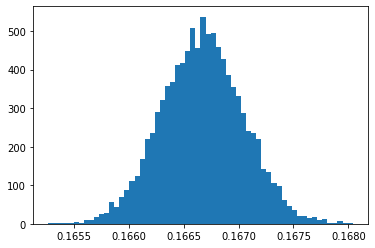

In [56]:
plt.hist(probs, bins='auto')
plt.show()

In [59]:
number_of_runs = 100
means = []
for run in tqdm(range(number_of_runs)):
  sample = random.choice(probs, size=100, replace=True, p=None)
  mean = np.mean(sample)
  means.append(mean)


100%|██████████| 100/100 [00:00<00:00, 1114.05it/s]


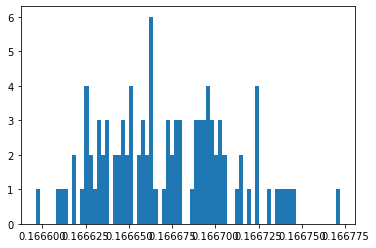

In [68]:
plt.hist(means, bins=75)
plt.show()

In [65]:
z = 95 # confidence value
n = 100 # sample size

ci_h = np.mean(means) + z*(np.std(means)/np.sqrt(n))
ci_l = np.mean(means) - z*(np.std(means)/np.sqrt(n))
print(ci_l, ci_h)

0.16632827395533953 0.16701588744466048
